In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import sklearn as slr
from sklearn.metrics import f1_score


## Question 1 

### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
 


In [3]:
df = pd.read_csv(r"C:\Users\Karan\Downloads\Company_Data.csv")
df1 = df.copy()
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [6]:
df1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [8]:
df1.shape

(400, 11)

C:\Users\Karan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


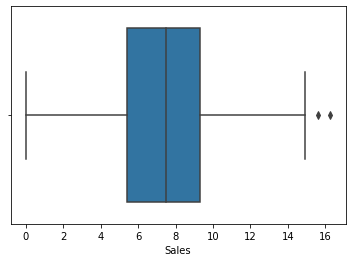

In [9]:

ax = sns.boxplot(df1['Sales'])
plt.show()

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


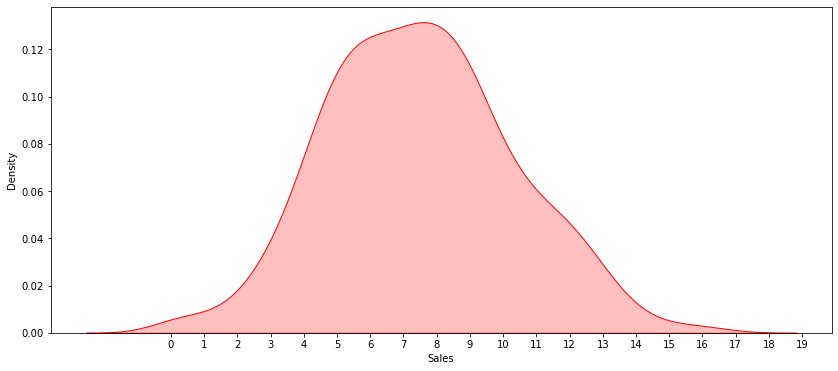

In [12]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(14,6))
print("Skew: {}".format(df1['Sales'].skew()))
print("Kurtosis: {}".format(df1['Sales'].kurtosis()))
ax = sns.kdeplot(df1['Sales'],shade=True,color='r')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [13]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

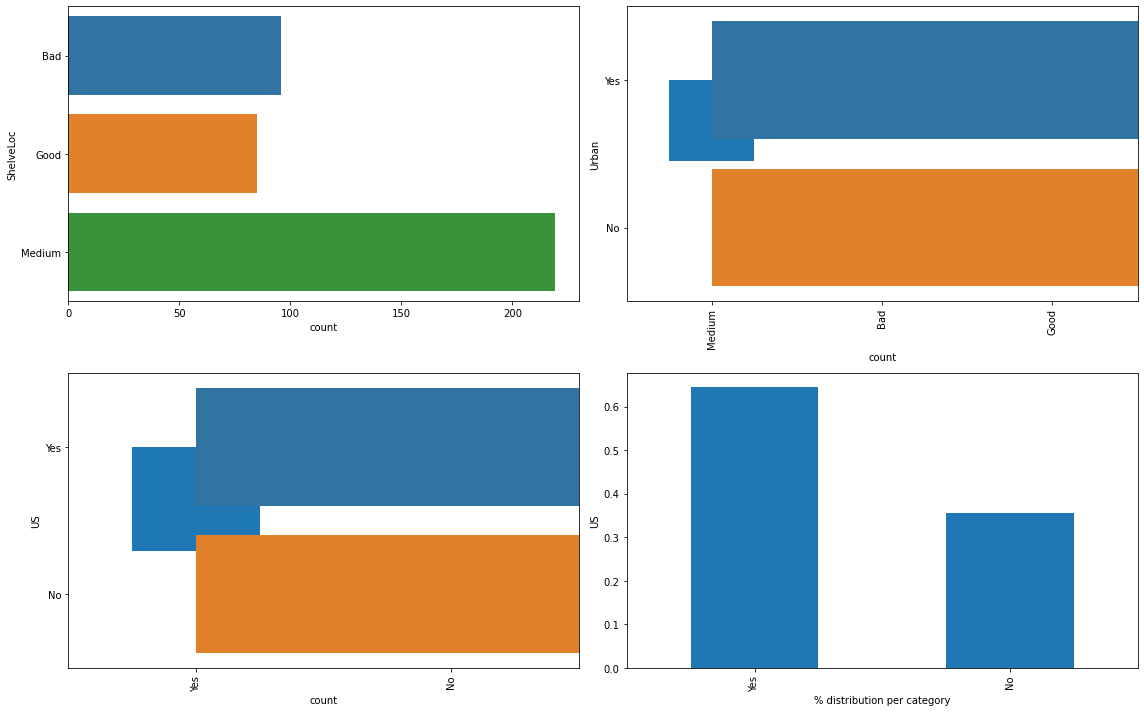

In [14]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [15]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

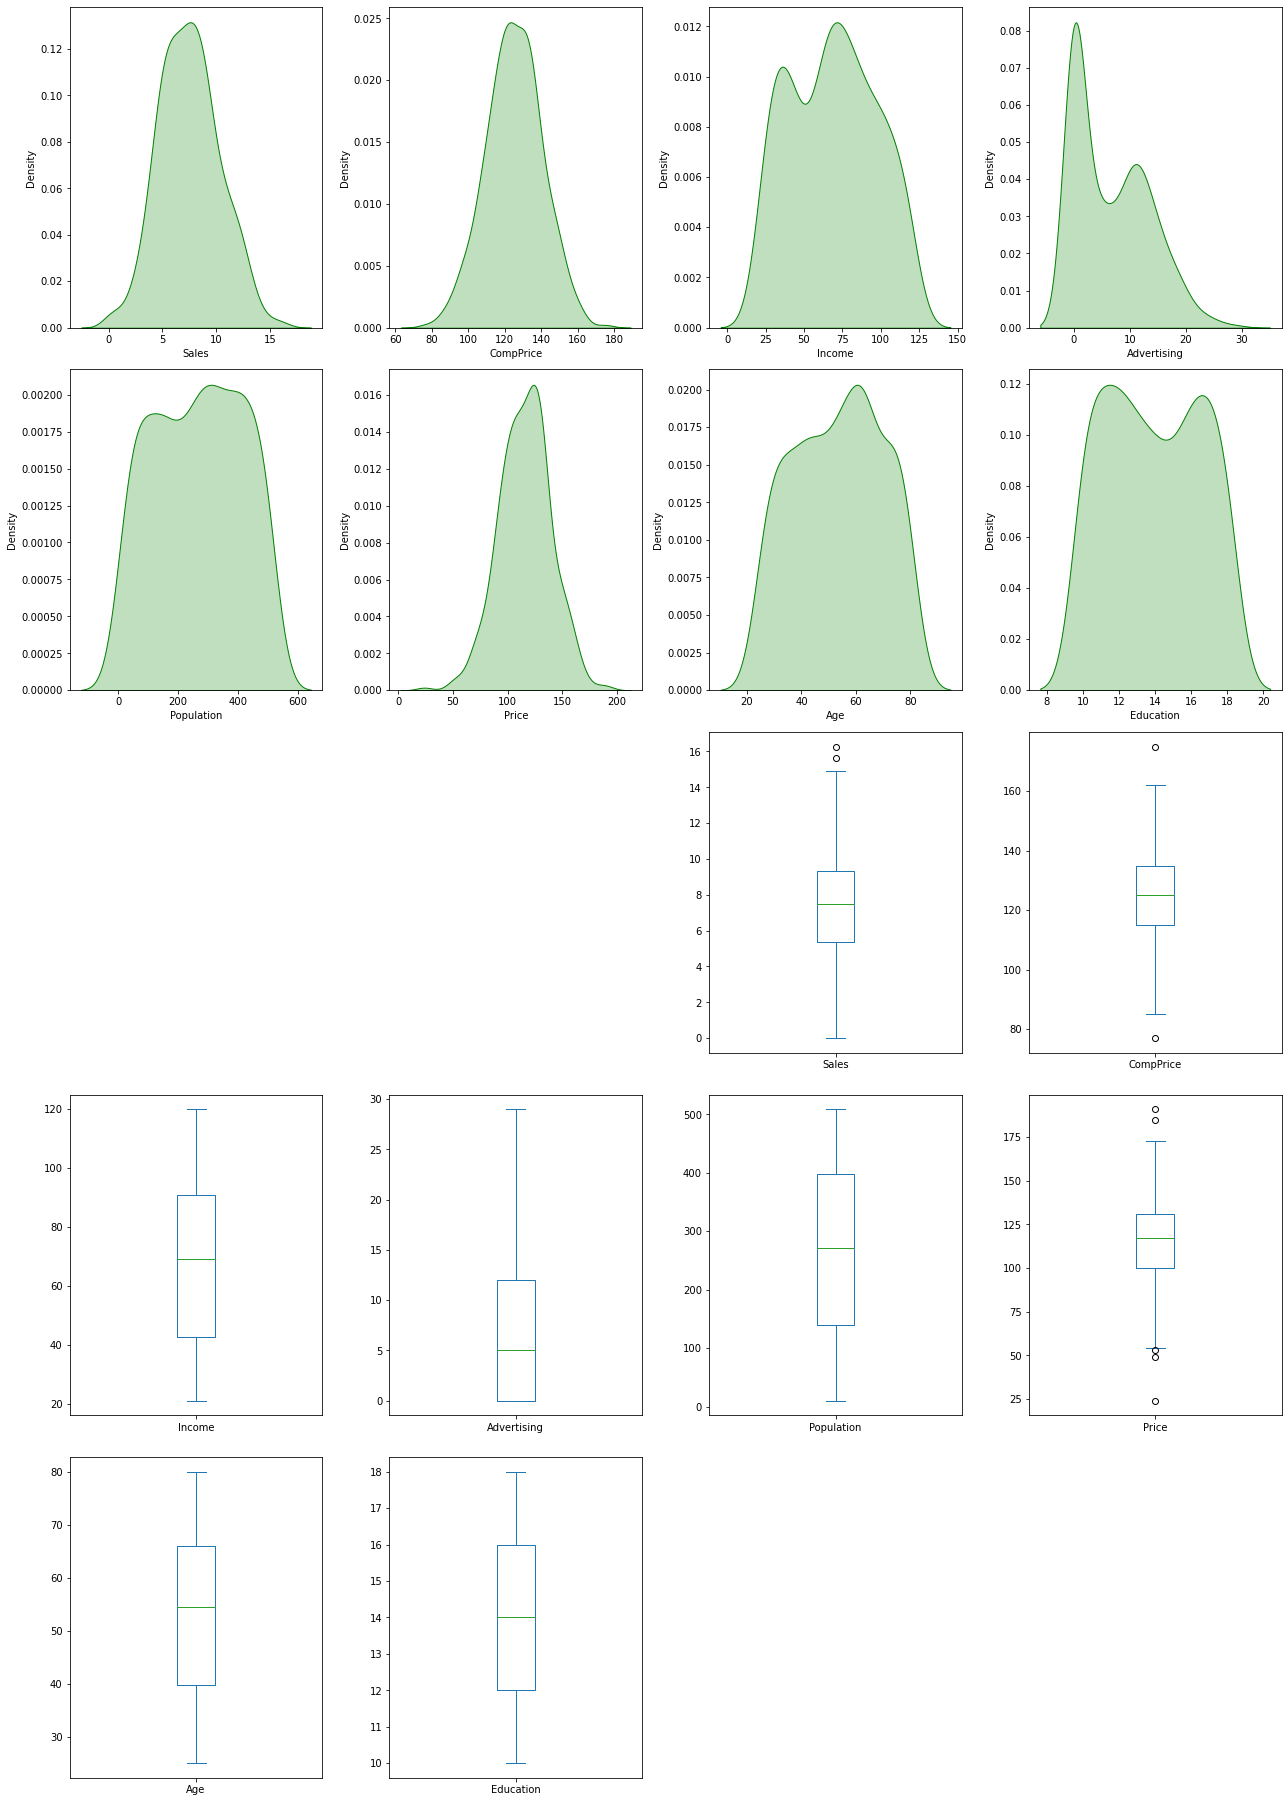

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [16]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

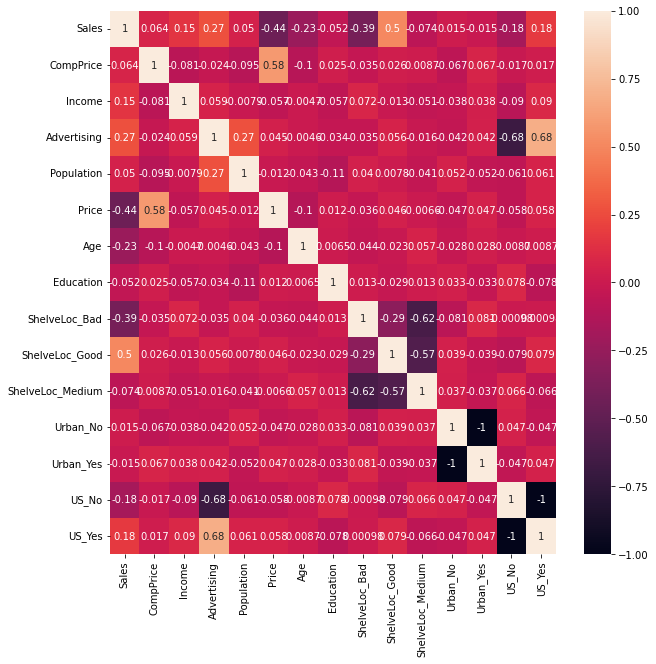

In [17]:
corr = df1.corr()
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

### Since the target variable is continious, we create a class of the value based on the mean
### <= 7.49 == "Small" and > 7.49 == "large"

In [18]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [19]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [21]:
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

In [22]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
from sklearn import tree

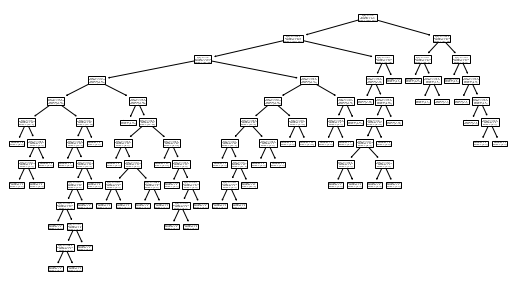

In [24]:
tree.plot_tree(model); #PLot the decision tree
plt.show()

In [26]:
pred_train = model.predict(x_train)

In [27]:
accuracy_score(y_train,pred_train)

1.0

In [28]:
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [29]:
pred_test = model.predict(x_test)

In [30]:
accuracy_score(y_test,pred_test)

0.7375

In [31]:
confusion_matrix(y_test,pred_test)

array([[25, 15],
       [ 6, 34]], dtype=int64)

In [32]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [33]:

df_t

,Actual,Predicted
89,large,small
337,large,large
390,small,large
312,small,small
6,small,small
...,...,...
121,large,large
222,small,small
173,small,large
111,small,small


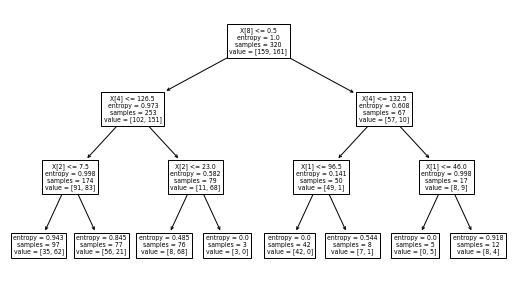

In [34]:
##Building Decision Tree Classifier using Entropy Criteria and max_depth = 3
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model2.fit(x_train,y_train)
DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree.plot_tree(model2); #PLot the decision tree
plt.show()

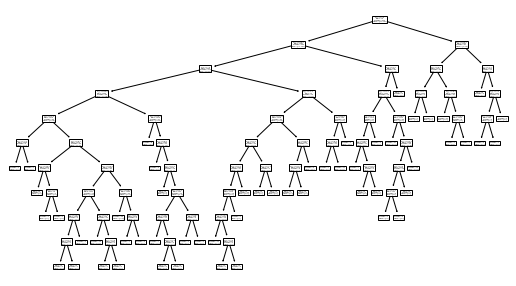

In [35]:
### Building Decision Tree Classifier (CART) using Gini Criteria
model_gini = DecisionTreeClassifier(criterion='gini')
model_gini.fit(x_train, y_train)
DecisionTreeClassifier()
tree.plot_tree(model_gini); #PLot the decision tree
plt.show()

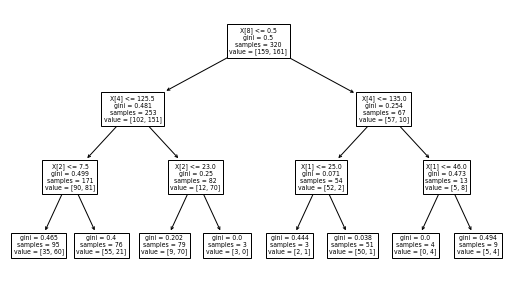

In [36]:
### Building Decision Tree Classifier (CART) using Gini Criteria and max_depth = 3
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth = 3)
model_gini2.fit(x_train, y_train)
DecisionTreeClassifier(max_depth=3)
tree.plot_tree(model_gini2); #PLot the decision tree
plt.show()

## Question 2
### Fraud check
### Use decision trees to prepare a model on fraud data treating those who have taxableincome <= 30000 as "Risky" and others are "Good"

In [40]:
# Import data and display first 5 rows
features = pd.read_csv(r"C:\Users\Karan\Downloads\Fraud_check (1).csv")
features.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [41]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [42]:
 features.shape

(600, 6)

In [43]:
features.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [44]:
features.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [45]:
#Creating dummy vairables dropping first dummy variable
df = pd.get_dummies(features,columns=['Undergrad','Urban'], drop_first=True)

In [46]:
df

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,Single,68833,50047,10,0,1
1,Divorced,33700,134075,18,1,1
2,Married,36925,160205,30,0,1
3,Single,50190,193264,15,1,1
4,Married,81002,27533,28,0,0
...,...,...,...,...,...,...
595,Divorced,76340,39492,7,1,1
596,Divorced,69967,55369,2,1,1
597,Divorced,47334,154058,0,0,1
598,Married,98592,180083,17,1,0


In [47]:
df.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,Single,68833,50047,10,0,1
1,Divorced,33700,134075,18,1,1
2,Married,36925,160205,30,0,1
3,Single,50190,193264,15,1,1
4,Married,81002,27533,28,0,0


In [48]:
df['Marital.Status'].unique()
df['Marital.Status'] = df['Marital.Status'].map({'Single':1,'Divorced':2,'Married':3})
print(df.head())

   Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0               1           68833            50047               10   
1               2           33700           134075               18   
2               3           36925           160205               30   
3               1           50190           193264               15   
4               3           81002            27533               28   

   Undergrad_YES  Urban_YES  
0              0          1  
1              1          1  
2              0          1  
3              1          1  
4              0          0  


C:\Users\Karan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


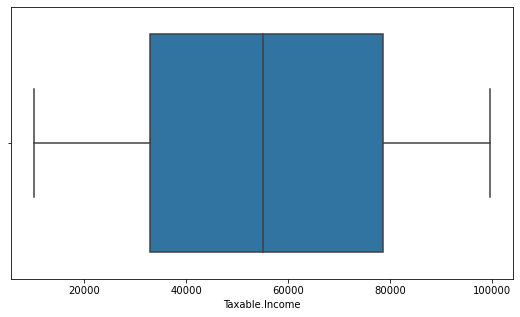

In [49]:
sns.boxplot(df['Taxable.Income'])
plt.show()

In [50]:
df.describe()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,1.961667,55208.375000,108747.368333,15.558333,0.520000,0.503333
std,0.827449,26204.827597,49850.075134,8.842147,0.500017,0.500406
min,1.000000,10003.000000,25779.000000,0.000000,0.000000,0.000000
25%,1.000000,32871.500000,66966.750000,8.000000,0.000000,0.000000
50%,2.000000,55074.500000,106493.500000,15.000000,1.000000,1.000000
75%,3.000000,78611.750000,150114.250000,24.000000,1.000000,1.000000
max,3.000000,99619.000000,199778.000000,30.000000,1.000000,1.000000


In [51]:
df['Tax_Income'] = df['Taxable.Income'].map(lambda x: 'Risky' if x>30000 else 'Good')
df.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Tax_Income
0,1,68833,50047,10,0,1,Risky
1,2,33700,134075,18,1,1,Risky
2,3,36925,160205,30,0,1,Risky
3,1,50190,193264,15,1,1,Risky
4,3,81002,27533,28,0,0,Risky


In [52]:
df.drop(['Taxable.Income'], axis = 1, inplace = True)
df.head()

,Marital.Status,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Tax_Income
0,1,50047,10,0,1,Risky
1,2,134075,18,1,1,Risky
2,3,160205,30,0,1,Risky
3,1,193264,15,1,1,Risky
4,3,27533,28,0,0,Risky


In [53]:
x=df.iloc[:,0:5]
y=df['Tax_Income']

In [54]:
x
y

0      Risky
1      Risky
2      Risky
3      Risky
4      Risky
       ...  
595    Risky
596    Risky
597    Risky
598    Risky
599    Risky
Name: Tax_Income, Length: 600, dtype: object

In [55]:
df['Tax_Income'].unique()

array(['Risky', 'Good'], dtype=object)

In [56]:
colnames = list(df.columns)
colnames

['Marital.Status',
 'City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Urban_YES',
 'Tax_Income']

In [57]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [58]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

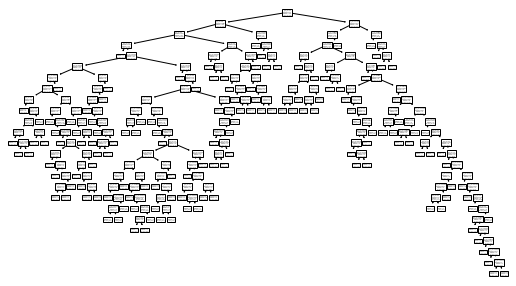

In [59]:
tree.plot_tree(model); #PLot the decision tree
plt.show()

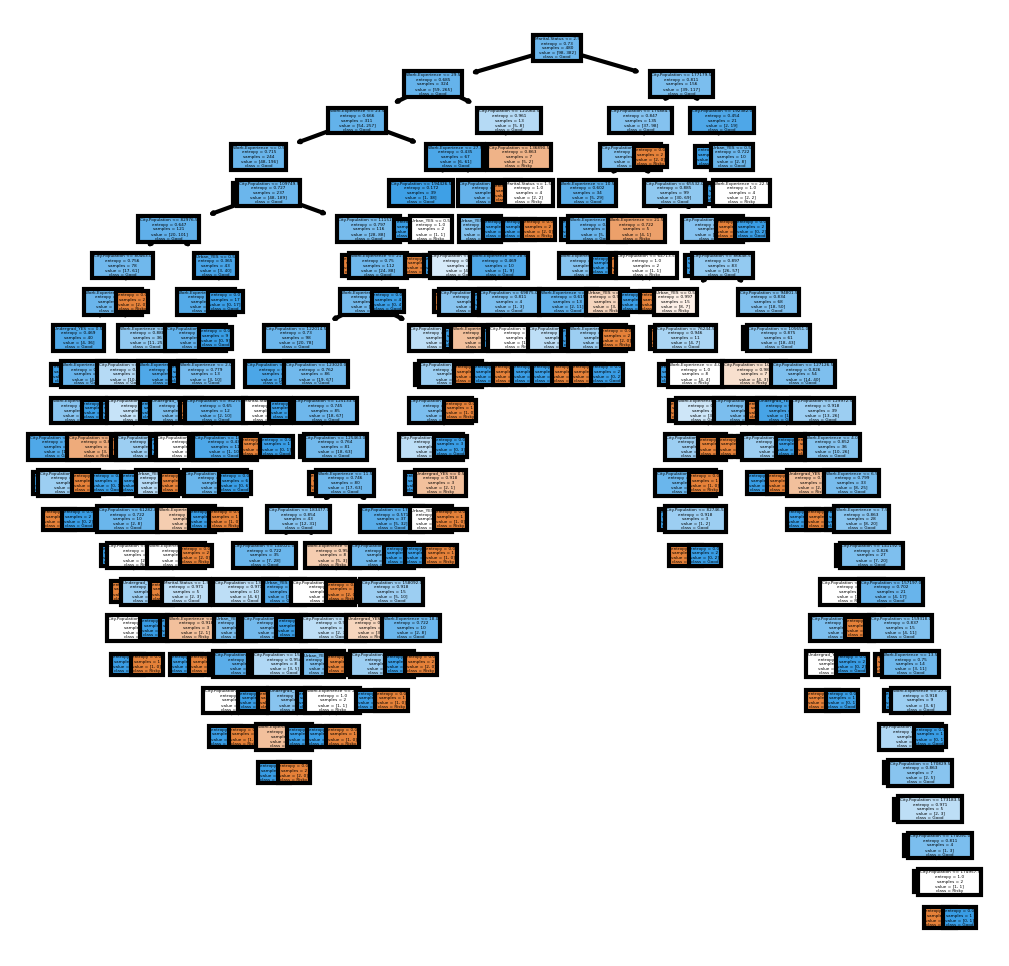

In [60]:
fn=['Marital.Status', 'City.Population', 'Work.Experience', 'Undergrad_YES', 'Urban_YES']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()

In [61]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Risky    90
Good     30
dtype: int64

In [62]:
preds


array(['Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Good',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Good', 'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'G

In [63]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good,Risky
Tax_Income,,
Good,6,20
Risky,24,70


In [64]:
# Accuracy 
np.mean(preds==y_test)

0.6333333333333333

In [65]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

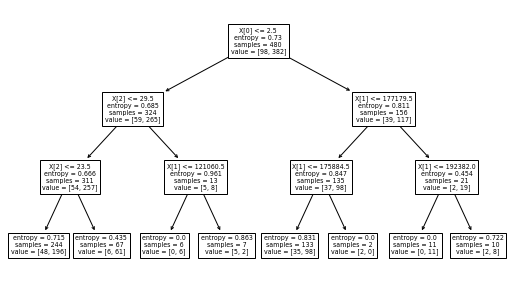

In [66]:
tree.plot_tree(model2); #PLot the decision tree
plt.show()

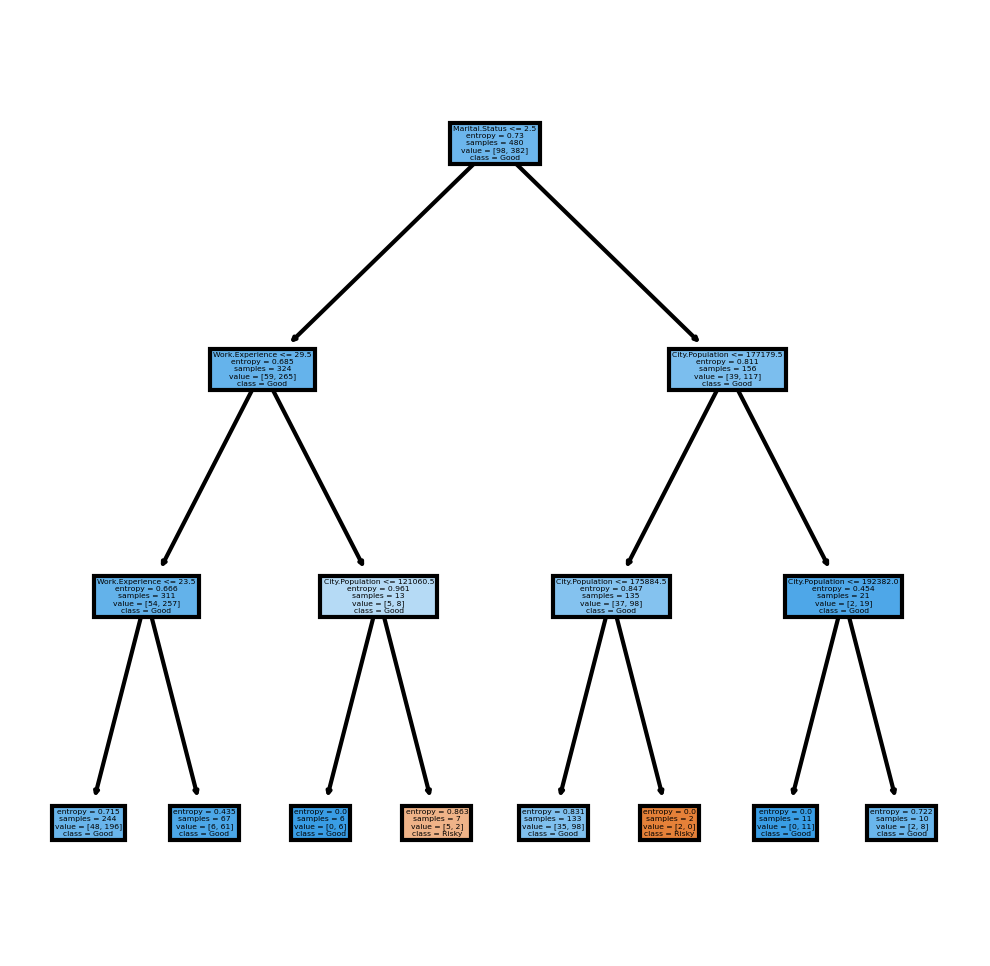

In [67]:
fn=['Marital.Status', 'City.Population', 'Work.Experience', 'Undergrad_YES', 'Urban_YES']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()

In [68]:
#Predicting on test data
preds2 = model2.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 
preds2

array(['Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risk

In [69]:

pd.crosstab(y_test,preds2) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good,Risky
Tax_Income,,
Good,0,26
Risky,1,93


In [70]:
model_gini = DecisionTreeClassifier(criterion='gini')

In [71]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier()

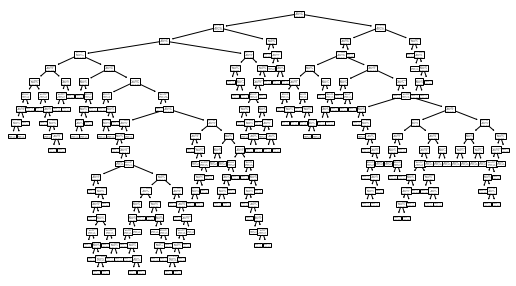

In [72]:
tree.plot_tree(model_gini); #PLot the decision tree
plt.show()

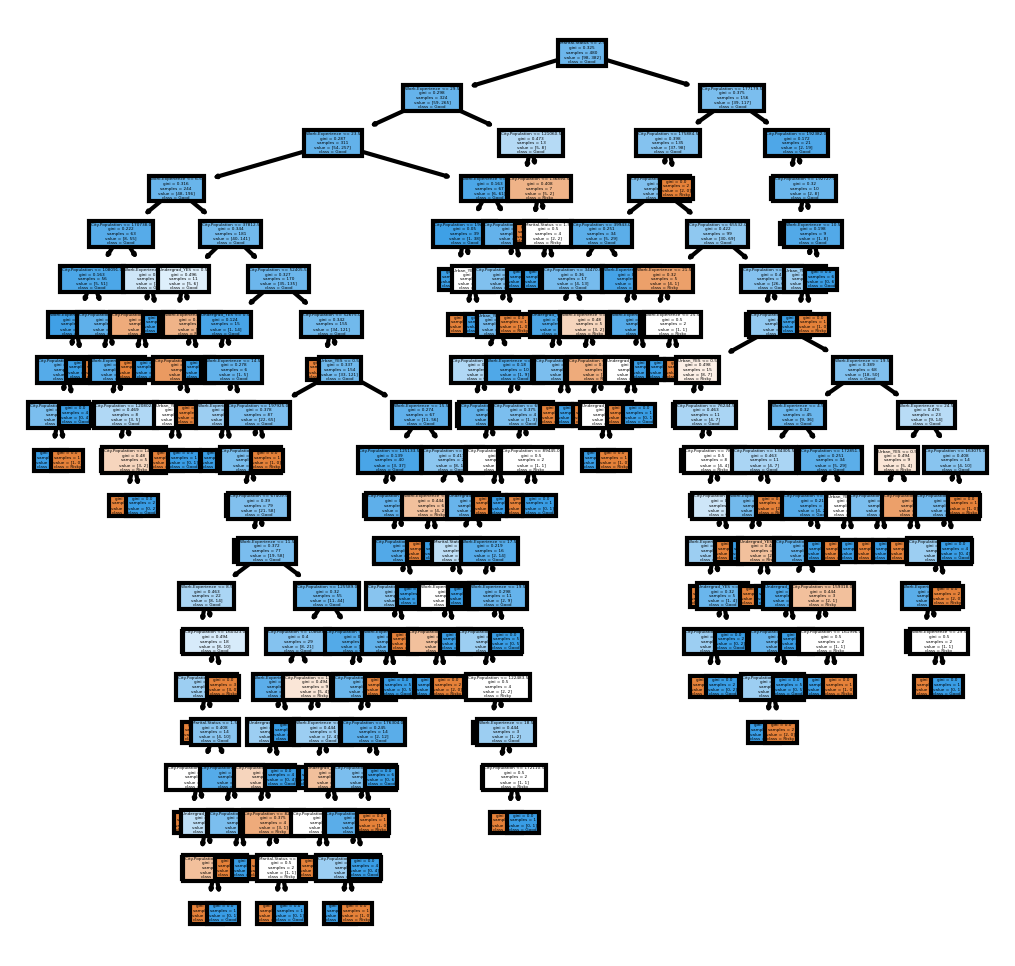

In [73]:
fn=['Marital.Status', 'City.Population', 'Work.Experience', 'Undergrad_YES', 'Urban_YES']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()

In [74]:
#Predicting on test data
pred_gini = model_gini.predict(x_test) # predicting on test data set 
pd.Series(pred_gini).value_counts() # getting the count of each category 

Risky    97
Good     23
dtype: int64

In [75]:
pd.crosstab(y_test,pred_gini) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good,Risky
Tax_Income,,
Good,4,22
Risky,19,75


In [76]:
# Accuracy 
np.mean(pred_gini==y_test)

0.6583333333333333

In [77]:
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth = 3)

In [78]:
model_gini2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

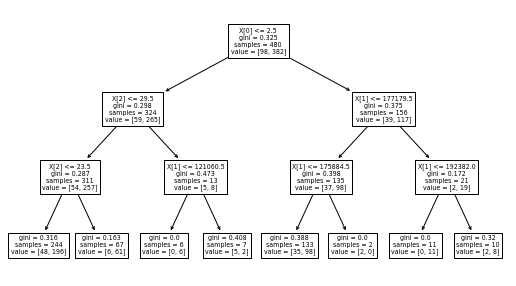

In [79]:
tree.plot_tree(model_gini2); #PLot the decision tree
plt.show()

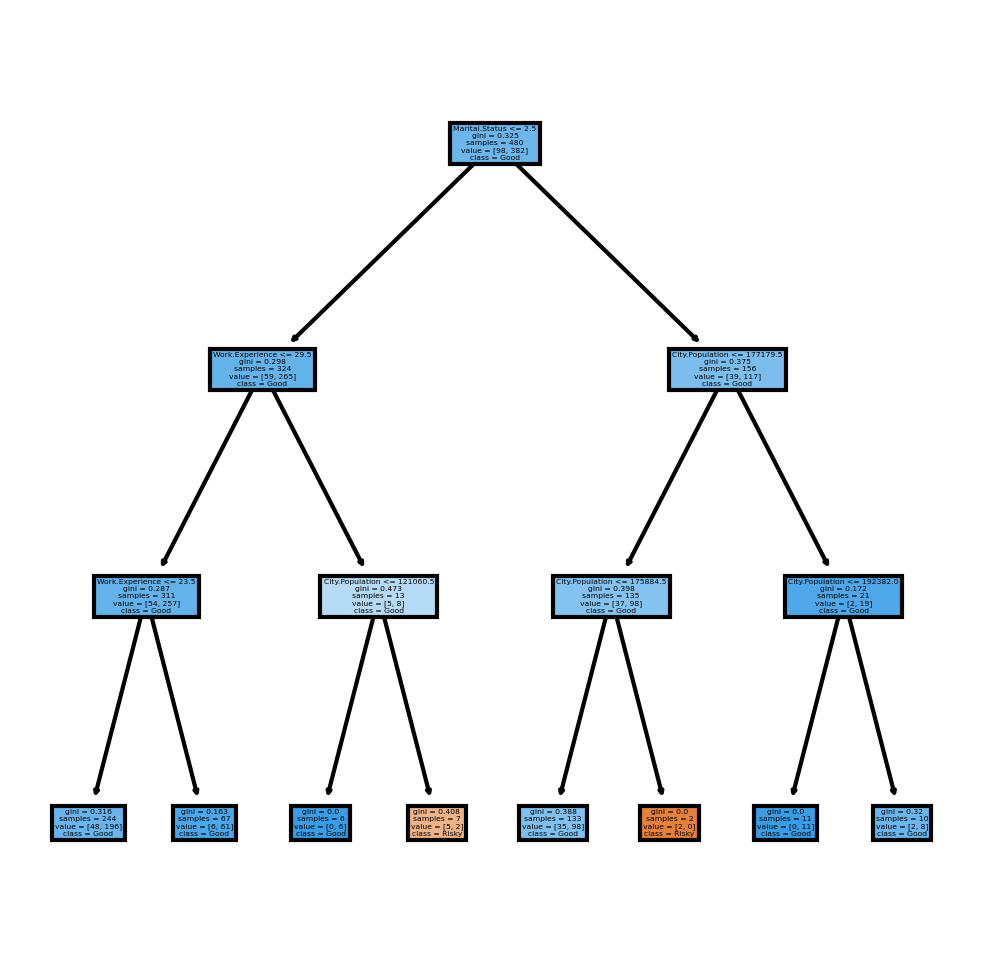

In [80]:
fn=['Marital.Status', 'City.Population', 'Work.Experience', 'Undergrad_YES', 'Urban_YES']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini2,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()

In [81]:
#Predicting on test data
pred_gini2 = model_gini2.predict(x_test) # predicting on test data set 
pd.Series(pred_gini2).value_counts() # getting the count of each category 

Risky    119
Good       1
dtype: int64

In [82]:
pred_gini2

array(['Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risk

In [83]:
pd.crosstab(y_test,pred_gini2)

col_0,Good,Risky
Tax_Income,,
Good,0,26
Risky,1,93


In [84]:
# Accuracy 
np.mean(pred_gini2==y_test)

0.775